# Simple Autoencoder



In [1]:
import os

import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import save_image

import seaborn as sns
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# !pip install torchviz
# from torchviz import make_dot

In [3]:
from google.colab import drive
drive.mount._DEBUG = True
drive.mount('/content/MyDrive', force_remount=False)

unset HISTFILE; export PS1="root@0293095e8336-91bc33ffc50c45a986a55c09890cb8fd: "
bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
/content# root@0293095e8336-91bc33ffc50c45a986a55c09890cb8fd: umount -f /content/MyDrive || umount /content/MyDrive; pkill -9 -x drive
umount: /content/MyDrive: no mount point specified.
umount: /content/MyDrive: no mount point specified.
root@0293095e8336-91bc33ffc50c45a986a55c09890cb8fd: pkill -9 -f /opt/google/drive/directoryprefetcher_binary
root@0293095e8336-91bc33ffc50c45a986a55c09890cb8fd: ( while `sleep 0.5`; do if [[ -d "/content/MyDrive" && "$(ls -A /content/MyDrive)" != "" ]]; then echo "google.colab.drive MOUNTED"; break; fi; done ) &
[1] 132
root@0293095e8336-91bc33ffc50c45a986a55c09890cb8fd: cat /tmp/tmp0j1j13rj/drive.fifo | head -1 | ( /opt/google/drive/drive --features=fuse_max_background:1000,max_read_qps:1000,max_write_qps:1000,max_operation_batch_size:15,max_parallel_push_task

In [ ]:
#cd /content/MyDrive/My Drive/Auto_An

# Change the data directory while re-running

In [4]:
transform = transforms.ToTensor()

#transform=transforms.Compose([ transforms.ToTensor(),  transforms.Normalize((0.5),(0.5)) ])

#mnist_data = MNIST('/content/MyDrive/My Drive/Auto_An/data', transform=transform, download=False)

mnist_data = torchvision.datasets.MNIST(root='./data',  train=True, download=True, transform=transform)

data_loader = DataLoader(mnist_data, batch_size=64, shuffle=True)

train_set, val_set = torch.utils.data.random_split(mnist_data, [50000, 10000])
#We can create splits if need be


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
dataiter=iter(data_loader)
images, labels=dataiter.next()
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


# FEED FORWARD NETWORK 
Encoder--Decoder (both Linear)

In [6]:
def save_checkpoint(state, filename="/content/MyDrive/My Drive/Auto_An/my_checkpoint.pth.tar"):
  print("saving checkpoint")
  torch.save(state,filename)

In [7]:

class Autoencoder(nn.Module):
  def __init__(self,width):
    
    super().__init__()
    #This is needed to initialize the nn.Module

    #N 784 (28 by 28)
    n=width # number of internal nodes
    self.encoder =nn.Sequential(
        nn.Linear(28*28, n),
        #nn.Linear(28*28, 128),
        nn.ReLU(),
        #nn.Linear(128,64),
        #nn.ReLU(),
        #nn.Linear(64,12),
        #nn.ReLU(),
        #nn.Linear(12,3), # N -> 3
    )
    self.decoder =nn.Sequential(
        #nn.Linear(3,12), 
        #nn.ReLU(),
        #nn.Linear(12,64),
        #nn.ReLU(),
        #nn.Linear(64,128),
        #nn.ReLU(),
        #nn.Linear(128, 28*28), # 3 -> N, 784
        nn.Linear(n, 28*28), # 3 -> N, 784
        ## Another activation function
        nn.Sigmoid() #if 0 to 1 
        #nn.Tanh() #if -1 to 1
    )

  def forward(self,x):
    encoded=self.encoder(x)
    decoded=self.decoder(encoded)
    return decoded

#Note:[-1,1] -> Apply tanh
## Normalization

In [8]:
model = Autoencoder(100)
criterion=nn.MSELoss()
optimizer= torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [9]:
num_epochs=8
outputs=[]

for epoch in range(num_epochs):

  ## Saving the model params
  if epoch==num_epochs-1:
    checkpoint={'state_dict': model.state_dict(), 'optinizer':optimizer.state_dict()}
    filename="/content/MyDrive/My Drive/Auto_An/model_1000_my_checkpoint.pth.tar"
    save_checkpoint(checkpoint, filename)
  ##

  for (img,_) in data_loader:
    img=img.reshape(-1,28*28)

    recon=model(img)

    loss= criterion(recon, img)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
  outputs.append((epoch, img, recon) )

Epoch:1, Loss:0.0144
Epoch:2, Loss:0.0072
Epoch:3, Loss:0.0064
Epoch:4, Loss:0.0047
Epoch:5, Loss:0.0050
Epoch:6, Loss:0.0045
Epoch:7, Loss:0.0045
saving checkpoint
Epoch:8, Loss:0.0039


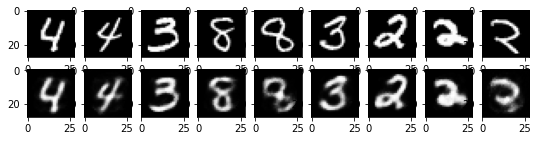

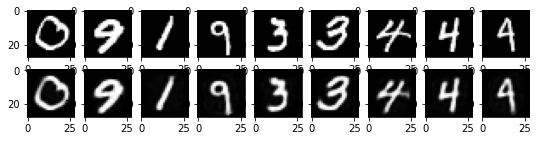

In [10]:

for k in range(0, num_epochs, 4):
  plt.figure(figsize=(9,2))
  plt.gray()
  imgs=outputs[k][1].detach().numpy()
  recon=outputs[k][2].detach().numpy()
  for i, item in enumerate(imgs):
    if i>=9: break
    plt.subplot(2,9,i+1)
    item=item.reshape(-1,28,28)
    plt.imshow(item[0])

  for i, item in enumerate(recon):
    if i>=9: break
    plt.subplot(2,9,9+i+1)
    item=item.reshape(-1,28,28)
    plt.imshow(item[0])

In [ ]:
print(model)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=1000, bias=True)
    (1): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=1000, out_features=784, bias=True)
    (1): Sigmoid()
  )
)


In [ ]:
# torch.save(model, PATH)

In [ ]:
model = Autoencoder(20)
criterion=nn.MSELoss()
optimizer= torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [ ]:
num_epochs=10
outputs=[]

for epoch in range(num_epochs):


  ## Saving the model params
  if epoch==num_epochs-1:
    checkpoint={'state_dict': model.state_dict(), 'optinizer':optimizer.state_dict()}
    save_checkpoint(checkpoint)
  ##


  for (img,_) in data_loader:
    img=img.reshape(-1,28*28)


    recon=model(img)

    loss= criterion(recon, img)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
  outputs.append((epoch, img, recon) )

Epoch:1, Loss:0.0286
Epoch:2, Loss:0.0248
Epoch:3, Loss:0.0201
Epoch:4, Loss:0.0189
Epoch:5, Loss:0.0208
Epoch:6, Loss:0.0190
Epoch:7, Loss:0.0191
Epoch:8, Loss:0.0201
Epoch:9, Loss:0.0210
saving checkpoint
Epoch:10, Loss:0.0200


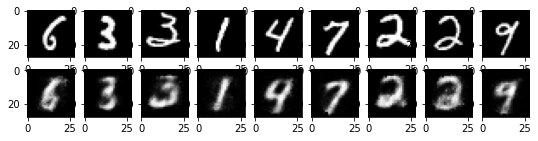

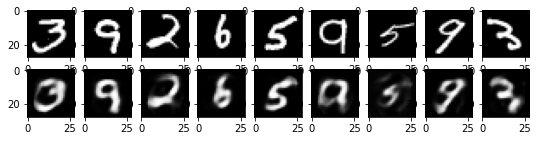

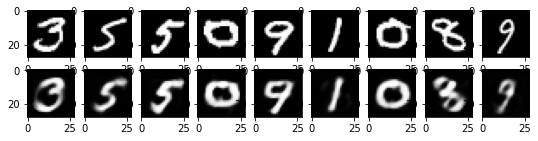

In [ ]:
for k in range(0, num_epochs, 4):
  plt.figure(figsize=(9,2))
  plt.gray()
  imgs=outputs[k][1].detach().numpy()
  recon=outputs[k][2].detach().numpy()
  for i, item in enumerate(imgs):
    if i>=9: break
    plt.subplot(2,9,i+1)
    item=item.reshape(-1,28,28)
    plt.imshow(item[0])

  for i, item in enumerate(recon):
    if i>=9: break
    plt.subplot(2,9,9+i+1)
    item=item.reshape(-1,28,28)
    plt.imshow(item[0])

In [ ]:
print(model)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=20, bias=True)
    (1): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=20, out_features=784, bias=True)
    (1): Sigmoid()
  )
)


We see that the 20 node model is worse compared to the 1000 node model, but not too bad. The question is what do the filters look like? Also what fraction of nodes are activated for each image. At this point, I do not want to impose sparsity, but hope it arises automatically from the nonnegativity of ReLU.

# Filters with 1000 node model

(100, 784)


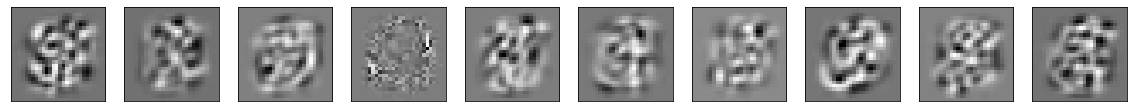

In [11]:
filter = model.encoder[0].weight.data.numpy()
print(filter.shape)

n = 10
plt.figure(figsize=(20, 5))
plt.gray()
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(filter[i+0].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Filters with 20 node model

In [ ]:
model = Autoencoder(20)
#Load from saved models (w parameters) in the future

filter = model.encoder[0].weight.data.numpy()
print(filter.shape)

(20, 784)


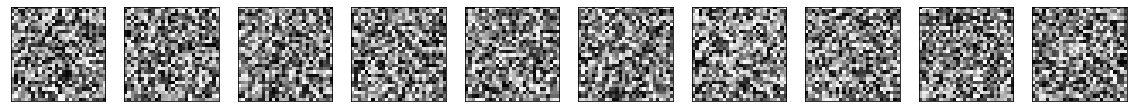

In [ ]:
n = 10
plt.figure(figsize=(20, 5))
plt.gray()
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(filter[i+0].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

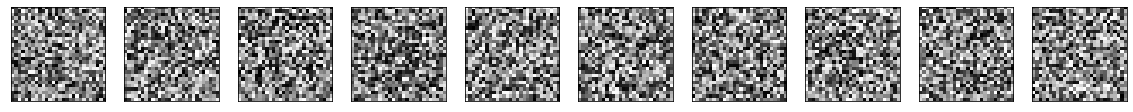

In [ ]:
filter = model.decoder[0].weight.data.numpy().T
n = 10
plt.figure(figsize=(20, 5))
plt.gray()
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(filter[i+0].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Fraction of nodes activated

Active nodes: The number of active nodes can be reduced aslo by adding sparsity constraint. 

### 20 nodes

#### Encoder level


In [ ]:
#model = Autoencoder(20)

activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook


tensor([[ 3.1845,  7.0369,  0.0000,  7.0370,  6.8858,  9.5629,  6.0675,  7.9137,
          7.2481,  0.7264,  1.3932,  4.0445,  7.9730,  6.1639,  2.1794,  4.0124,
          1.1739,  5.5065, 13.3730,  9.0378]])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


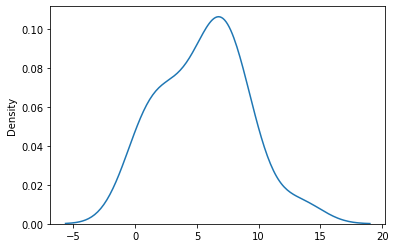

In [ ]:

model.encoder.register_forward_hook(get_activation('encoder'))


dataiter=iter(data_loader)
images, labels=dataiter.next()

#1st image of the batch
enc_scores=model(images[0].reshape(1,28*28)).detach().numpy().ravel()

print(activation['encoder'])


sns.distplot(activation['encoder'], hist=False, label='van_auto')

arr_act=activation['encoder'].data.numpy().ravel()

In [ ]:
fraction_active=arr_act[arr_act>=0.1].shape[0]/arr_act.shape[0]
print(f'fraction_active_nodes {fraction_active}')

fraction_active_nodes 0.95


### 1000 nodes

In [ ]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook


#model = Autoencoder(1000)

model.encoder.register_forward_hook(get_activation('encoder'))

dataiter=iter(data_loader)
images, labels=dataiter.next()

#1st image of the batch
enc_scores=model(images[0].reshape(1,28*28)).detach().numpy().ravel()

#print(activation['encoder'])

arr_act=activation['encoder'].data.numpy().ravel()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


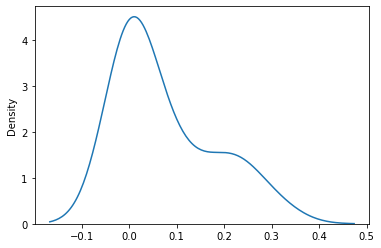

In [ ]:
sns.distplot(activation['encoder'], hist=False, label='van_auto')

In [ ]:
#Took the threshold to be 0.1, can be set at 0.
fraction_active=arr_act[arr_act>=0.1].shape[0]/arr_act.shape[0]
print(f'fraction_active_nodes {fraction_active}')

fraction_active_nodes 0.3


In [ ]:
arr_act.shape
arr_act[arr_act>=0.1].shape[0]

6